<a href="https://colab.research.google.com/github/isawich/Visi-Komputer-TI-2C/blob/main/Visikom__JB_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum 1: Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


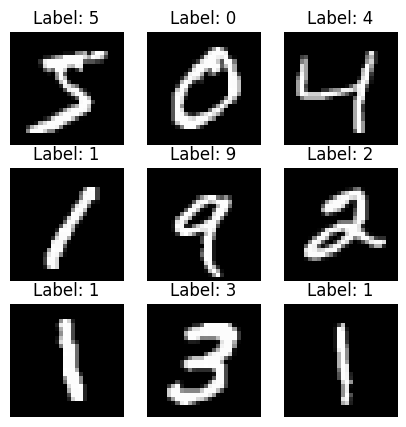

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5, 5))
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

Tugas Kecil: Mengganti range(9) dengan range(25)

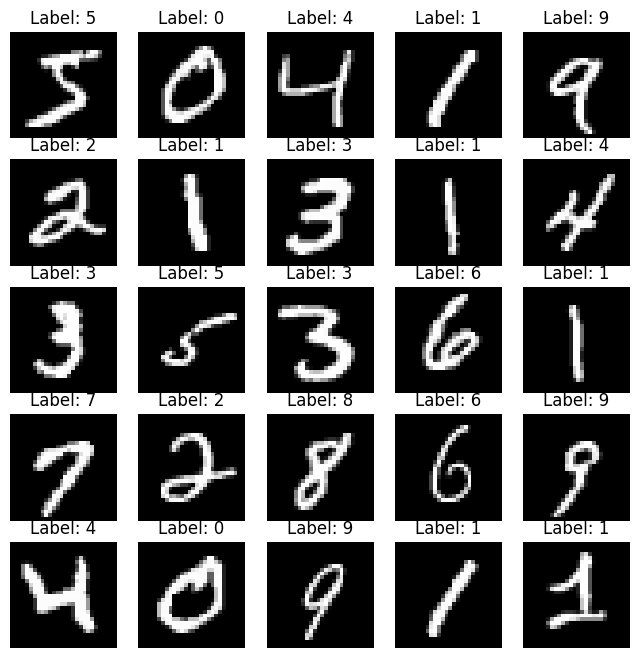

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(8, 8)) # Increased figure size for better display of 25 images
for i in range(25):
  plt.subplot(5,5, i+1) # Changed grid to 5x5
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

Praktikum 2: Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


Tugas Kecil: kernel diubah dari linear menjadi rbf

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


Praktikum 3: Membangun CNN Sedarhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8928 - loss: 0.3635 - val_accuracy: 0.9823 - val_loss: 0.0660
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9801 - loss: 0.0671 - val_accuracy: 0.9833 - val_loss: 0.0593
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9863 - loss: 0.0451 - val_accuracy: 0.9858 - val_loss: 0.0511
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9900 - loss: 0.0313 - val_accuracy: 0.9835 - val_loss: 0.0613
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0.9858 - val_loss: 0.0537


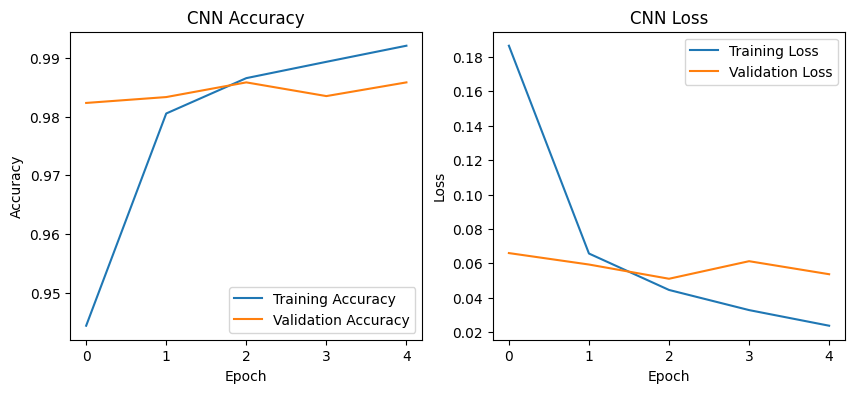

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist

# Load MNIST dataset again to ensure correct data is used
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Tugas Kecil: menambahkan lapisan Conv2D lagi sebelum Flatten

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step - accuracy: 0.8994 - loss: 0.3364 - val_accuracy: 0.9828 - val_loss: 0.0614
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 88s 29ms/step - accuracy: 0.9844 - loss: 0.0493 - val_accuracy: 0.9868 - val_loss: 0.0473
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.9904 - loss: 0.0331 - val_accuracy: 0.9907 - val_loss: 0.0340
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9913 - loss: 0.0249 - val_accuracy: 0.9922 - val_loss: 0.0340
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9880 - val_loss: 0.0450


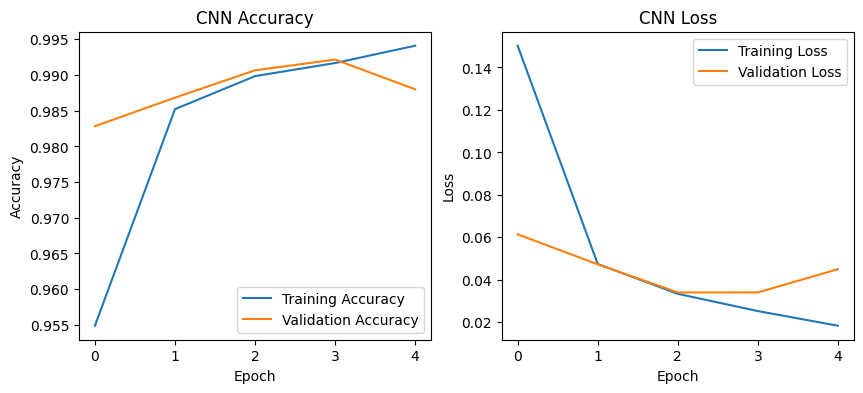

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Normalisasi dan reshape data
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

# Model CNN dengan 2 lapisan Conv2D
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    # Tambahan lapisan Conv2D
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training model
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum 4: Eksperimen dengan Dataset Lebih Kompleks (CIFAR -10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 41ms/step - accuracy: 0.3869 - loss: 1.6744 - val_accuracy: 0.5806 - val_loss: 1.2006
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6039 - loss: 1.1321 - val_accuracy: 0.6476 - val_loss: 1.0155
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6593 - loss: 0.9755 - val_accuracy: 0.6790 - val_loss: 0.9386
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.7004 - loss: 0.8585 - val_accuracy: 0.6646 - val_loss: 0.9611
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 41ms/step - accuracy: 0.7248 - loss: 0.7922 - val_accuracy: 0.6908 - val_loss: 0.9007
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.7494 - loss: 0.7197 - val_accuracy: 0.6914 - val_loss: 0.8906
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.7684 - loss: 0.6641 - val_accuracy: 0.6914 - val_loss: 0.9058
Epoch 8/10
1407/1407 ━━

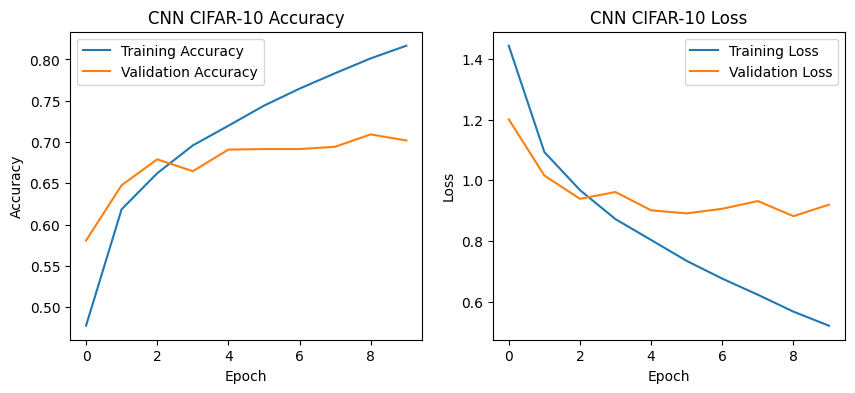

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definisi model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas Kecil: tambahkan dropout(0.5) sebelum lapisan Dense terakhir

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 42ms/step - accuracy: 0.2868 - loss: 1.9241 - val_accuracy: 0.5192 - val_loss: 1.3534
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 42ms/step - accuracy: 0.4595 - loss: 1.4967 - val_accuracy: 0.5748 - val_loss: 1.2186
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.5112 - loss: 1.3557 - val_accuracy: 0.6124 - val_loss: 1.1209
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.5431 - loss: 1.2684 - val_accuracy: 0.6354 - val_loss: 1.0446
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.5713 - loss: 1.1967 - val_accuracy: 0.6488 - val_loss: 1.0333
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.5849 - loss: 1.1561 - val_accuracy: 0.6578 - val_loss: 0.9892
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.6078 - loss: 1.1114 - val_accuracy: 0.6638 - val_loss: 0.9576
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.6193 -

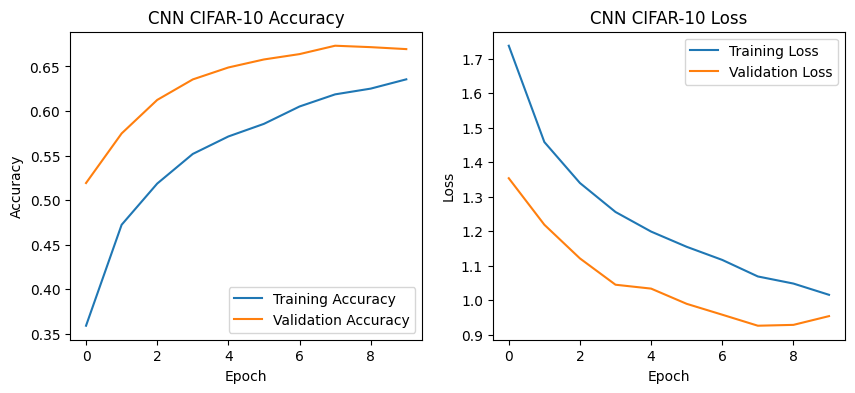

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definisi model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # <---- Dropout ditambahkan di sini
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum 5: Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 639s 453ms/step - accuracy: 0.4470 - loss: 1.5609 - val_accuracy: 0.5734 - val_loss: 1.2215
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 658s 436ms/step - accuracy: 0.5768 - loss: 1.2134 - val_accuracy: 0.5908 - val_loss: 1.1704
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 626s 439ms/step - accuracy: 0.6007 - loss: 1.1496 - val_accuracy: 0.5952 - val_loss: 1.1419
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 638s 450ms/step - accuracy: 0.6157 - loss: 1.1019 - val_accuracy: 0.6086 - val_loss: 1.1188
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 681s 450ms/step - accuracy: 0.6316 - loss: 1.0621 - val_accuracy: 0.6088 - val_loss: 1.1150


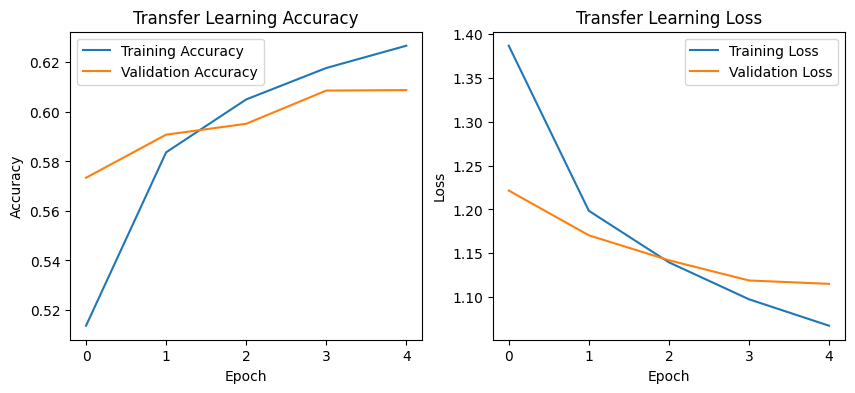

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load base model VGG16 (tanpa top layer)
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32, 32, 3))

# Freeze base model (tidak dilatih ulang)
base_model.trainable = False

# Definisi model dengan transfer learning
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas Kecil: mengaktifkan 1-2 lapisan terakhir dari base_model (fine-tuning)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 690s 489ms/step - accuracy: 0.5063 - loss: 1.4077 - val_accuracy: 0.5914 - val_loss: 1.1606
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 703s 500ms/step - accuracy: 0.6258 - loss: 1.0671 - val_accuracy: 0.6146 - val_loss: 1.0818
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 721s 485ms/step - accuracy: 0.6607 - loss: 0.9637 - val_accuracy: 0.6456 - val_loss: 1.0151
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 742s 485ms/step - accuracy: 0.6772 - loss: 0.9225 - val_accuracy: 0.6790 - val_loss: 0.9375
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 742s 485ms/step - accuracy: 0.6938 - loss: 0.8691 - val_accuracy: 0.6538 - val_loss: 1.0006


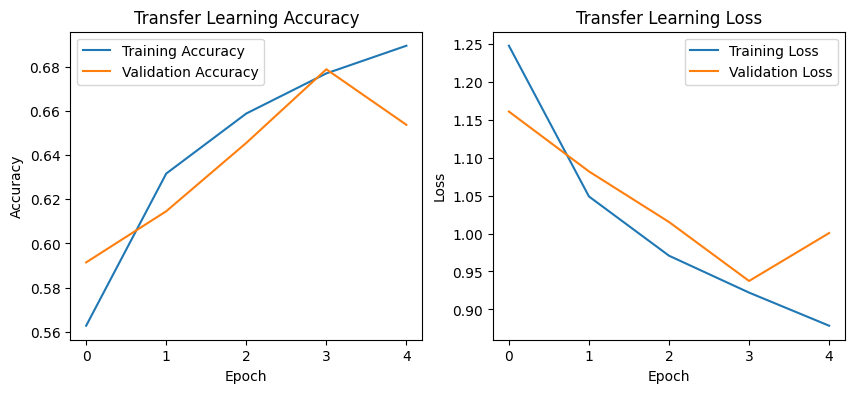

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load base model VGG16 (tanpa top layer)
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32, 32, 3))

# Awalnya freeze semua layer
base_model.trainable = False

# Aktifkan 2 layer terakhir untuk fine-tuning
for layer in base_model.layers[-2:]:
    layer.trainable = True

# Definisi model dengan transfer learning
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum 6: Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 391ms/step
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1000
           1       0.63      0.69      0.66      1000
           2       0.48      0.54      0.51      1000
           3       0.47      0.40      0.43      1000
           4       0.58      0.48      0.52      1000
           5       0.59      0.46      0.52      1000
           6       0.54      0.75      0.63      1000
           7       0.70      0.62      0.66      1000
           8       0.70      0.75      0.72      1000
           9       0.60      0.62      0.61      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



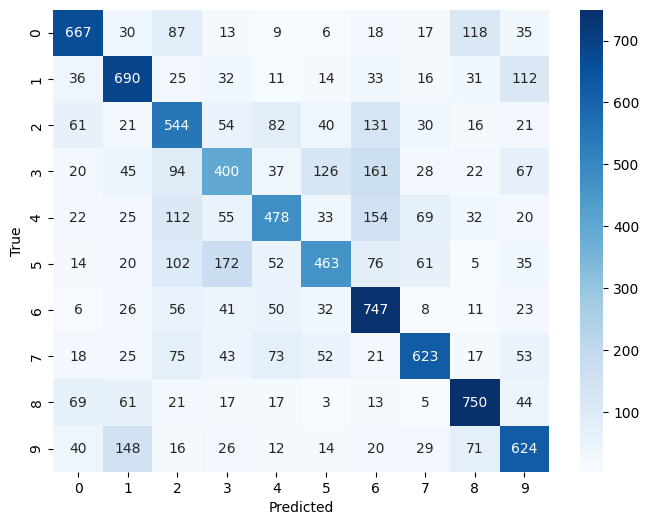

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**PENUGASAN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Bangun CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8688 - loss: 0.4172 - val_accuracy: 0.9836 - val_loss: 0.0456
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9746 - loss: 0.0830 - val_accuracy: 0.9890 - val_loss: 0.0336
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9829 - loss: 0.0574 - val_accuracy: 0.9903 - val_loss: 0.0273
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9864 - loss: 0.0453 - val_accuracy: 0.9914 - val_loss: 0.0253
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9922 - val_loss: 0.0224


In [ ]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-
# hitam) =====

import numpy as np
from PIL import Image, ImageOps
def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar
    jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)
    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi
    # putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)
    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))
    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size
    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))
    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    # Tambah channel dim (28,28,1)

    arr = arr[..., None]
    return canvas, arr

Saving angka (1).png to angka (1).png
Saving angka (2).png to angka (2).png
Saving angka (3).png to angka (3).png
Saving angka (4).png to angka (4).png


In [ ]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Melakukan preprocessing pada gambar PIL untuk mengubahnya
    menjadi format 28x28, grayscale, dan dinormalisasi seperti dataset MNIST.
    """
    # 1. Konversi ke grayscale dan auto-contrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # 2. Invert warna jika latar belakangnya putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # 3. Cari bounding box (kotak pembatas) dari digit
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # 4. Resize gambar agar digit berukuran 20x20
    img.thumbnail((20,20), Image.Resampling.LANCZOS)
    w, h = img.size

    # 5. Tambahkan padding untuk membuat ukuran gambar menjadi 28x28
    canvas = Image.new('L', (28,28), color=0)
    canvas.paste(img, ((28-w)//2, (28-h)//2))

    # 6. Normalisasi nilai piksel ke rentang [0,1] dan ubah shape ke (28,28,1)
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]

    return canvas, arr

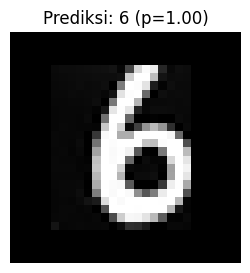

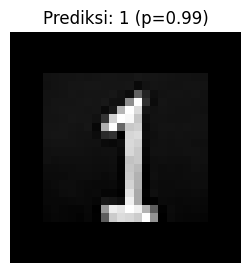

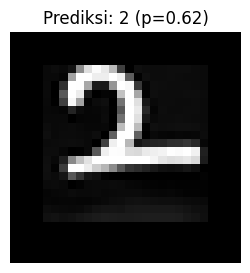

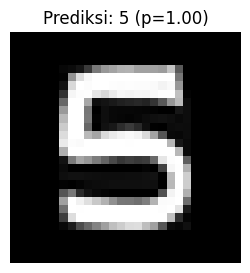


Rekap Prediksi (CNN):
- angka (1).png -> 6 (p=1.000)
- angka (2).png -> 1 (p=0.985)
- angka (3).png -> 2 (p=0.622)
- angka (4).png -> 5 (p=1.000)


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Pilihan A: Prediksi dengan CNN dari D3
# Pastikan Anda sudah menjalankan D3 dan memiliki variabel 'model' (Keras) terlatih pada MNIST.

results = []
if 'model' not in locals():
    print("FATAL ERROR: Variabel 'model' (CNN) tidak ditemukan. Pastikan Anda sudah melatih model di praktikum D3.")
else:
    for fname in uploaded.keys():
        try:
            img_pil = Image.open(fname)
        except Exception as e:
            print(f"Error saat membuka file {fname}: {e}")
            continue

        # disp: PIL untuk ditampilkan, x: (28,28,1)
        disp, x = preprocess_to_mnist_28x28(img_pil)

        # Ubah ke shape yang dibutuhkan CNN: (1, 28, 28, 1)
        x_batch = np.expand_dims(x, axis=0)

        # Prediksi menggunakan model CNN (Keras)
        probs = model.predict(x_batch, verbose=0)[0]
        pred = int(np.argmax(probs))
        conf = float(np.max(probs))

        results.append((fname, pred, conf))

        # Tampilkan hasil
        plt.figure(figsize=(3,3))
        plt.imshow(disp, cmap='gray')
        plt.title(f"Prediksi: {pred} (p={conf:.2f})")
        plt.axis('off')
        plt.show()

    # Rekap ringkas
    print("\nRekap Prediksi (CNN):")
    for r in results:
        print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")